-------

# Introduction to Python - Data Visualization

Nicholas Sim (Last Updated: 11 December 2023)

In Part 3, we explore basic functions in data visualisation using the `matplotlib` and `seaborn` libraries.

The `matplotlib` library enables the construction of  highly customizable data visualisations. This library is motivated by the plotting capabilities of Matlab, and is similar to the `lattice` package in R. However, while `matplotlib` is highly customizable, is it more complicated to use than, say, plotting packages with similar capabiltiies like the `ggplot2` package in R.

For quick visualisation in Python, we may use the `seaborn` library, which contains pre-built visualisation tools  (the name `seaborn` came from Sam Seaborn of the show West Wing). `seaborn` creates beautiful visualisations with just a line of code. 
However, as it is built upon the  `matplotlib` library, the customization of these visualisations may require the use of `matplotlib` syntax. Thus, we will begin our discussion with `matplotlib` before moving on to `seaborn`.

Note: This is still work in progress.


## Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import image module
from IPython.display import Image

#### Reading data file

In [2]:
df = pd.read_csv('tips.csv')
df.sample(10)

,total_bill,tip,sex,smoker,day,time,size
228,13.28,2.72,Male,No,Sat,Dinner,2
62,11.02,1.98,Male,Yes,Sat,Dinner,2
37,16.93,3.07,Female,No,Sat,Dinner,3
153,24.55,2.00,Male,No,Sun,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4
93,16.32,4.30,Female,Yes,Fri,Dinner,2
225,16.27,2.50,Female,Yes,Fri,Lunch,2
50,12.54,2.50,Male,No,Sun,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
80,19.44,3.00,Male,Yes,Thur,Lunch,2


Description of the variables: 

   * tip in dollars,
   * bill in dollars,
   * sex of the bill payer,
   * whether there were smokers in the party,
   * day of the week,
   * time of day,
   * size of the party.

* References
    * Bryant, P. G. and Smith, M (1995) Practical Data Analysis: Case Studies in Business Statistics. Homewood, IL: Richard D. Irwin Publishing:

#### Generating a new variable

In [3]:
# Generate a new variable called "price_per_person"

df['price_per_person'] = round(df['total_bill']/df['size'],2) # use np.round to round to 2 decimal places
df

,total_bill,tip,sex,smoker,day,time,size,price_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91


## Matplotlib

Matplotlib is a plotting library inspired by the Matlab programming language. There are three layers in its architecture - backend, artist and scripting. When creating a plot, we will be utilizing the artist layer in the library. 

Matplotlib has both functional programming and OOP syntax for constructing plots. The OOP approach is highly customizable, unlike the functional approach. We will demonstrate both.

In [4]:
import matplotlib.pyplot as plt

### Using Pyplot Functions

Python programming, being an OOP language, focuses on the object that we wish to manipulate. However, in Matplotlib, it is possible to construct a plot without creating a "figure" object. Here, we construct a histogram for the variable `total_bill`. We may construct other plots using a similar syntax (for example, plt.plot for a line plot, plt.box for a boxplot, etc.). Notice that the object in question is plt (i.e. the library itself). There is no object created for the figure, which we may modify.

Note: Jupyter notebook will display the plot without plt.show. However, using plt.show removes text information about the plot, which is most often something you will not need.  

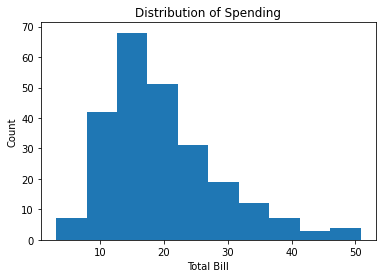

In [5]:
# Plot the histogram
plt.hist(df['total_bill']) 

# Add labels and titles
plt.xlabel('Total Bill')
plt.ylabel('Count')
plt.title('Distribution of Spending')

# Show the figure
plt.show() # The bars should have an edge. The frame needs to be removed manually

### OOP Approach

Rather than applying functions to create a figure, we may first create a figure object and "overlay" the plot on the figure object.

### A basic example

The most basic example would be to first "instantiate" the figure object (create an object instance), add axes to the object, then plot on these axes.

**Step 1**: Instantiate a figure object 

A figure "canvas" will be created here. The figure canvas will contain subplots. 

<div>
<img src="matplotlib_step1.png" width="500"/>
</div>




**Step 2**: Create a set of axes

The plot will be mounted on the axes, not the figure itself. Note that, by default, the axes will fill the entire figure object (not a subset as shown here for illustration).

<div>
<img src="matplotlib_step2.png" width="500"/>
</div>




**Step 3**: 

Mount the plot on the axes

<div>
<img src="matplotlib_step3.png" width="500"/>
</div>


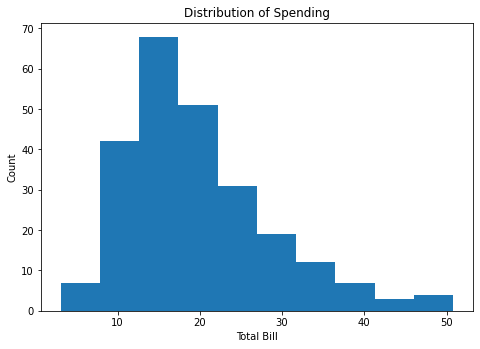

In [6]:
# Instantiate a figure object
fig = plt.figure() 

# Add axes to the figure 
ax = fig.add_axes([0,0,1,1]) 

# 0,0 is the point where you want the bottom left point of the figure to start
# 1,1 is the width and height of the figure relative to point 0,0.

# Plot (or "mount") the histogram on the axes
ax.hist(df['total_bill']) 

# Add labels and title (not using the axis object)
plt.xlabel('Total Bill')
plt.ylabel('Count')
plt.title('Distribution of Spending');

### Creating the figure and axes object at the same time

Rather than creating a figure object, then adding a set of axes, we may do both at the same time using plt.subplots. plt.subplots unpack the figure object and the axes as a tuple. 

The axes object, in turn, is a numpy array. Unless we specify the number of rows and columns in plt.subplots, it will return only a single set of axes (i.e. it is a numpy array with a single element). We will explore constructing multiple plots later in this tutorial. 


Here, let's create a figure canvas `fig` and axes object `ax` using `plt.subplots()`, returns `ax` as a one-element numpy array (note that by default, the axes object will fill the entire figure canvas, not as a subset as shown): 
<br/><br/>

<div>
<img src="matplotlib_one.png" width="500"/>
</div>


To adjust the figure size to 12x8 inches, we use the figsize parameter in plt.subplots. We also set the number of bins to 10 in the histogram. 

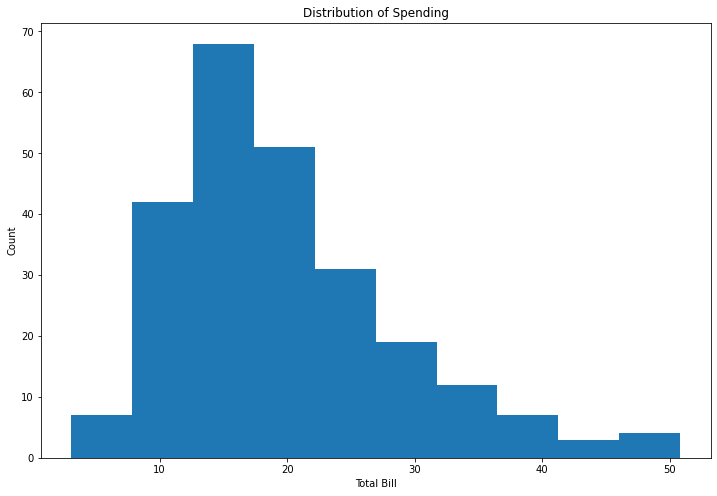

In [7]:
# Instantiate a figure object
fig, ax = plt.subplots(figsize = (12,8)) 

# Plot the histogram (use 10 bins)
ax.hist(df['total_bill'], bins = 10) 

# Add labels and title
plt.xlabel('Total Bill')
plt.ylabel('Count')
plt.title('Distribution of Spending');

### Changing the plot appearance using the axes object

The axes object can be used to adjust the appearance of the plot. For instance, let's remove the top and right border of the figure. 

Let's also change the color of the plot to yellow.

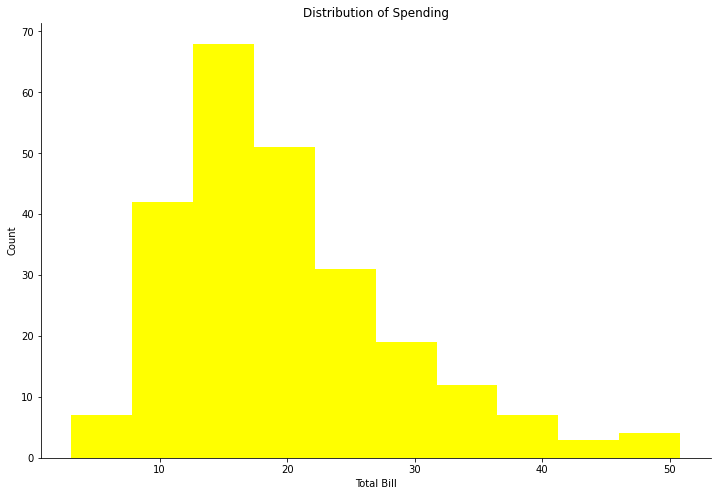

In [8]:
# Instantiate a figure object
fig, ax = plt.subplots(figsize = (12,8)) 

# Remove the top and right border
ax.spines["top"].set_visible(False) # remove the top border
ax.spines["right"].set_visible(False) # remove the right border

# Plot the histogram (use 10 bins, yellow color, and black edge)
ax.hist(df['total_bill'], bins = 10, color = "yellow") 

# Add labels and title
plt.xlabel('Total Bill')
plt.ylabel('Count')
plt.title('Distribution of Spending');

### Setting the labels and figure title using the axes call methods 

We may add adjust the figure title, labels, etc. by using call methods from the axes object, e.g. ax.set_xlabel, ax.set_ylabel, ax.set_title, etc.

Let's also add a black edge on the bars of the histogram.

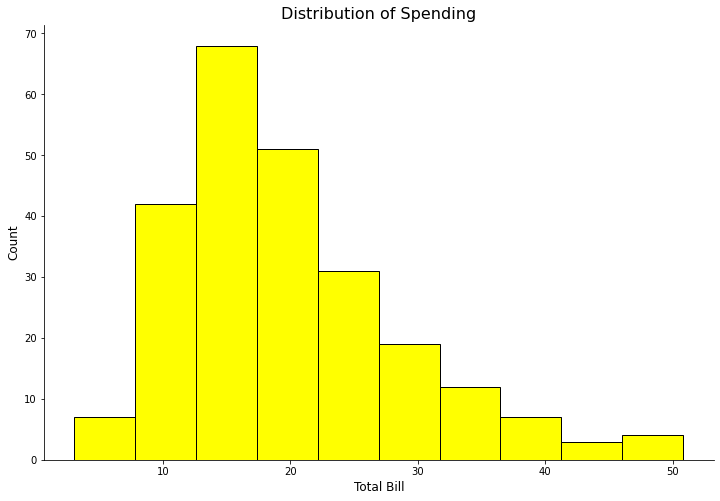

In [9]:
# Instantiate a figure object
fig, ax = plt.subplots(figsize = (12,8)) 

# Remove the top and right border
ax.spines["top"].set_visible(False) # remove the top border
ax.spines["right"].set_visible(False) # remove the right border

# Plot the histogram (use 10 bins, yellow color, and black edge)
ax.hist(df['total_bill'], bins = 10, color = "yellow", ec = "black") 

# Add labels and title using axes object
ax.set_xlabel('Total Bill', size = 12)
ax.set_ylabel('Count', size = 12)
ax.set_title('Distribution of Spending', size = 16);

### Using the axes object to create multiple plots

We may use the axes object to create multiple plots. Recall that the plot is "mounted" on a st of axes. Therefore, to create multiple plots, all we need is to create another set of axes, and then mount another plot on it.

As an example, we will overlay a scatter plot of `tip` against `total_bill` as an inset onto the histogram above. We will create the figure and axes object to construct the histogram as before. However, we will create a second axes object using fig.add_axes to construct the scatter plot. 


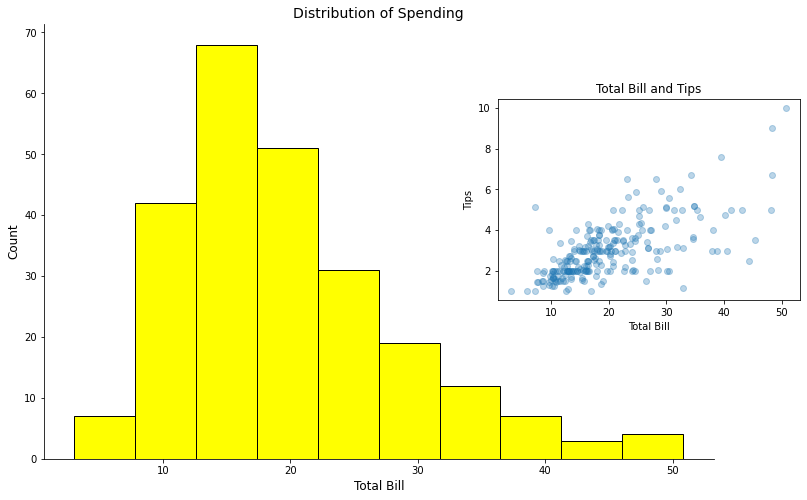

In [10]:
# Instantiate a figure object
fig, ax1 = plt.subplots(figsize = (12,8)) 

# Remove the top and right border
ax1.spines["top"].set_visible(False) # remove the top border
ax1.spines["right"].set_visible(False) # remove the right border

# Plot the histogram (use 10 bins, yellow color, and black edge)
ax1.hist(df['total_bill'], bins = 10, color = "yellow", ec = "black") 

# Add labels and title using axes object
ax1.set_xlabel('Total Bill', size = 12)
ax1.set_ylabel('Count', size = 12)
ax1.set_title('Distribution of Spending', size = 14);

# Create another set of axes using add_axes
ax2 = fig.add_axes([0.65,0.4,0.35,0.35])

# Plot the line plot 
ax2.scatter(df['total_bill'],df['tip'],  alpha=0.3)  

# Add labels and title using axes object
ax2.set_xlabel('Total Bill', size = 10)
ax2.set_ylabel('Tips', size = 10)
ax2.set_title('Total Bill and Tips', size = 12);


### Constructing two plots side-by-side and saving the plot

We use plt.subplots to create a figure object with two columns. The axes object is now an array with two elements, and is indexed by ax[0] and ax[1]. Since the axes object is an array, there is no need to create a separate axes object as we have done earlier. 

Using the same principles before, we may mount the histogram and scatter plot on ax[0] and ax[1] respectively.
<br/><br/>

<div>
<img src="matplotlib_array.png" width="500"/>
</div>


Let's set the figure resolution to 200 dpi (dots per inch) and save the figure as "plotex1.png". To prevent the output from truncating the plot, we set the bounding box parameter (bbox_inches) to "tight".

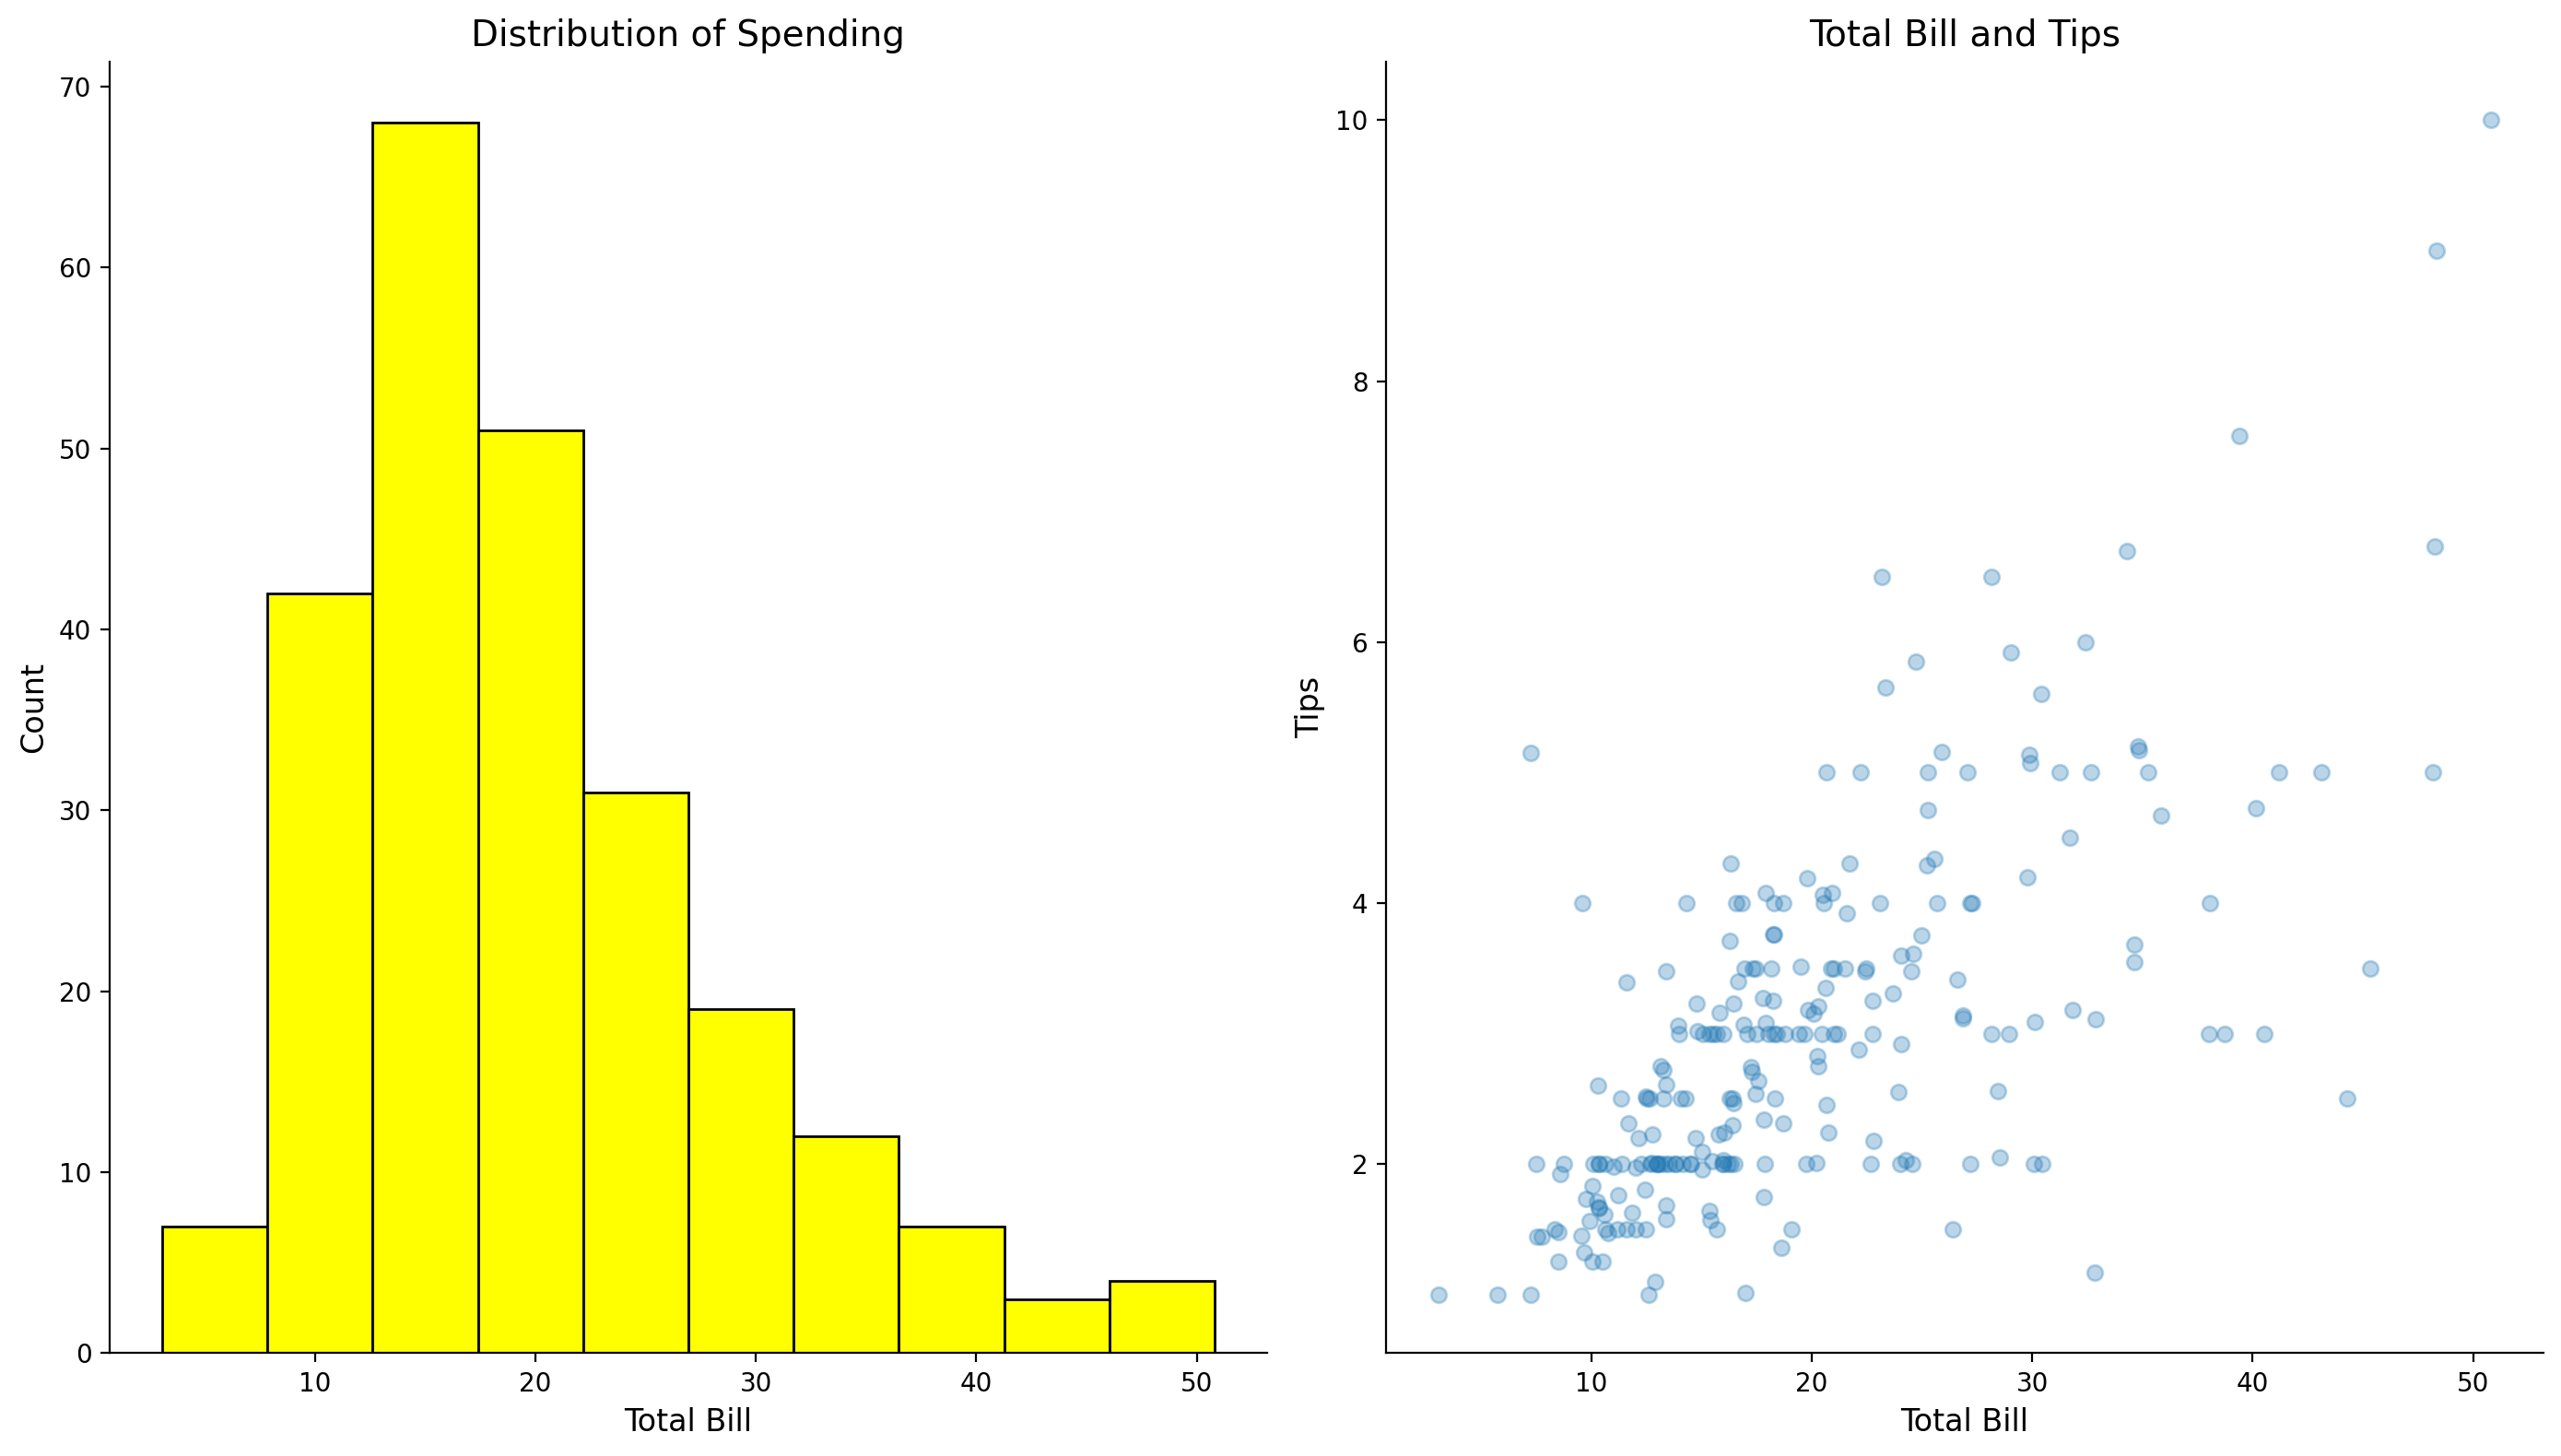

In [11]:
# Instantiate a figure object 
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize = (14,8), dpi = 200) 

# Remove the top and right border of both histogram and scatter plot
ax[0].spines["top"].set_visible(False) # remove the top border
ax[0].spines["right"].set_visible(False) # remove the right border

ax[1].spines["top"].set_visible(False) # remove the top border
ax[1].spines["right"].set_visible(False) # remove the right border


# Plot the histogram (use 10 bins, yellow color, and black edge)
ax[0].hist(df['total_bill'], bins = 10, color = "yellow", ec = "black") 

# Add labels and title using axes object
ax[0].set_xlabel('Total Bill', fontsize = 12)
ax[0].set_ylabel('Count', fontsize = 12)
ax[0].set_title('Distribution of Spending', fontsize = 14);


# Plot the scatter plot 
ax[1].scatter(df['total_bill'],df['tip'],  alpha=0.3)  

# Add labels and title using axes object
ax[1].set_xlabel('Total Bill', fontsize = 12)
ax[1].set_ylabel('Tips', fontsize = 12)
ax[1].set_title('Total Bill and Tips', fontsize = 14)

# Optional code to fit multiple plots automatically
plt.tight_layout()

# Save the plot
fig.savefig("plotex1.jpg",bbox_inches = "tight");



We use plt.subplots to construct a matrix of plots. In this case, the axes object `ax` will be a two array and `ax` will have both row and column index.

## Seaborn

The `matplotlib` library produces highly customizable plots but the codes are more complicated to write. If customization is not a priority, we may use the `seaborn` library to conveniently produces nice looking visualisations with minimal code writing.

As `seaborn` is a wrapper for `matplotlib`, customization of `seaborn` plots are possible using the plt method calls from `matplotlib` as were shown earlier. For example, we may add a plot title and axes labels using plt.title, plt.xlabel, plt.ylabel.

The basic syntax to construct a plot in `seaborn`, for example, for a scatterplot, 

`sns.scatterplot(data = df, x = "total_bill", y = "tip")`

Other plots available in `seaborn` include

* `sns.displot` (for a distribution plot)
* `sns.histplot` (for a histogram)
* `sns.barplot` (for a barplot)
* `sns.catplot` (for various types of plots for a categorical variable)
* `sns.lineplot` (for a time series plot)


We import seaborn using the command `import seaborn as sns` 

### A basic example 

We construct a distribution plot, i.e. histogram, for `total_bill`.

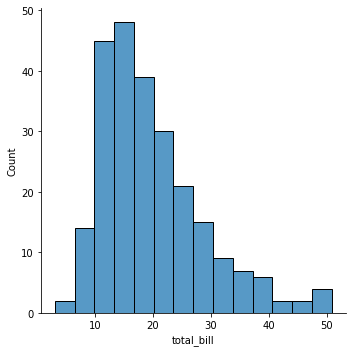

In [12]:
# A basic histogram
sns.displot(data = df, x = 'total_bill' ); #distribution plot

### Adding a title and axes labels using plt call methods

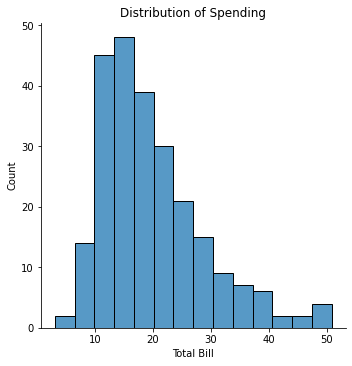

In [13]:
# A basic histogram
sns.displot(data = df, x='total_bill'); #distribution plot

# Add labels and title
plt.xlabel('Total Bill')
plt.ylabel('Count')
plt.title('Distribution of Spending');

### Adding a title and axes labels using axes call methods

Rather than using plt call methods, we may first save the seaborn plot into an object first, say `g`. The saved object will contain both figure and axes objects, i.e. `g.figure` and `g.ax`.

As before, we may add a plot title and axes labels using `matplotlib` call methods on the axes object, which is now `g.ax`. 


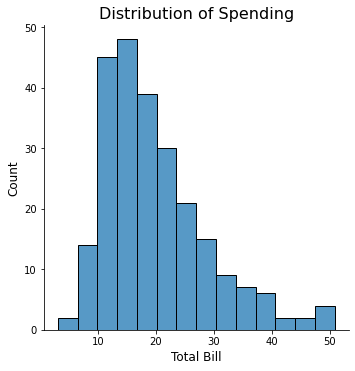

In [14]:
# A basic histogram
g = sns.displot(data = df, x='total_bill'); #distribution plot

# Add labels and title
g.ax.set_xlabel('Total Bill', size = 12)
g.ax.set_ylabel('Count', size = 12)
g.ax.set_title('Distribution of Spending', fontsize = 16);


### Adding more features into the plot

We may add more features into the plot using the various options available in seaborn. We show two plots below.

1. We overlay a kernel density estimator to smoothen out the distribution of the histogram using the "kde" option. The option is "kde = True".

2. We include the indicator variable "smoker" as a color aesthetic using the "hue" option. The option is "hue = 'smoker' " 



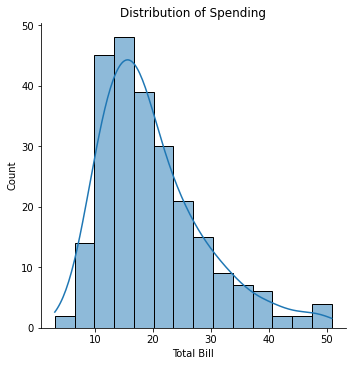

In [15]:
# A histogram with a kernel density estimator
sns.displot(data = df, x='total_bill', kde =True) # add a kernel density estimator

# Add labels and title
plt.xlabel('Total Bill')
plt.ylabel('Count')
plt.title('Distribution of Spending');

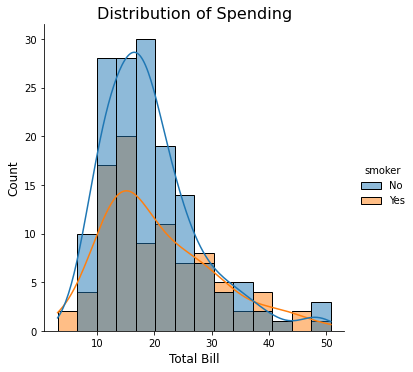

In [16]:
# A histogram with a kernel density estimator, with smoker as a color aesthetic
sns.displot(data = df, x='total_bill', kde = True, hue = 'smoker') # hue is a color aesthetic 

# Add labels and title
plt.xlabel('Total Bill', size  = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Spending', size = 16);

### Creating a facet plot

A facet plot can be generated quickly in `seaborn` using the option "col". We facet the plot by "time", which has two values - "lunch" and "dinner" by passing in the option "col = 'time' "

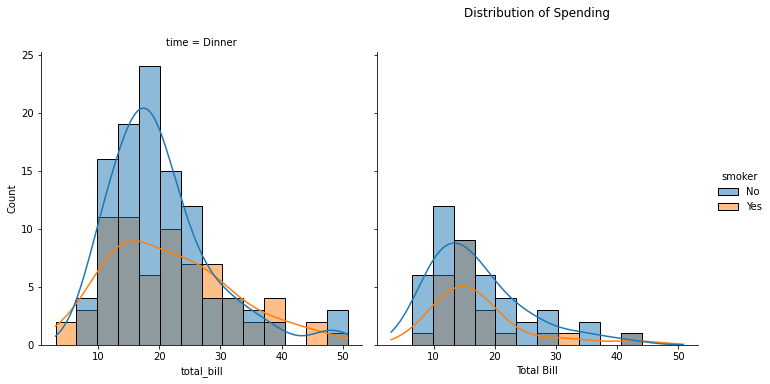

In [17]:
# A histogram with a kernel density estimator, with smoker as a color aesthetic, and facet by time
sns.displot(data = df, x='total_bill', kde = True, hue = 'smoker', col = 'time') # add a facet by time

# Add labels and title
plt.xlabel('Total Bill')
plt.ylabel('Count')
plt.title('Distribution of Spending', y=1.1); #Use plt.suptitle rather than plt.title to change the overall title

### Cleaning up the plots using facetgrid methods

Notice that the title and axes labels of the facet plots are not correct. We should have an overall title called "Distribution of Spending", but this became the title for the second plot. Likewise, the x-axis label is only applied to the second plot, not the first. 

To change the plot features, we need to save the plot output as an object first. 

Then, we set the axis labels and figure title using methods from the saved plot. Conventionally, we would have made these changes through the axes call methods. However, as the facet plot is based on the seaborn function FacetGrid, the call methods for declaring the plot title and axes labels are different. 

For instance, to declare the x-axis labels (for both plots), we use the method set_xlabels on `g` than set_xlabel on `g.ax` (i.e. the axes on the saved figure object `g`). 

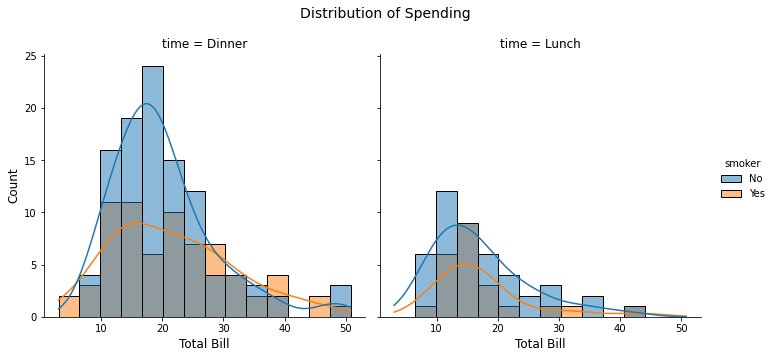

In [18]:
# A histogram with a kernel density estimator, with smoker as a color aesthetic, and facet by time
g = sns.displot(data = df, x='total_bill', kde = True, hue = 'smoker', col = 'time') # add a facet by time


# Add labels and title
g.set_xlabels("Total Bill", size = 12)
g.set_ylabels("Count", size = 12)
g.set_titles(size = 12)
g.figure.suptitle('Distribution of Spending', size = 14) 
g.figure.subplots_adjust(top=0.85); # Adjust the position of the suptitle


### Cleaning up the plots using call methods on separated axes

We may separate the axes in a facet plot using the `flatten()` method so that we may set the plot title and axes labels in the conventional way using axes call methods.

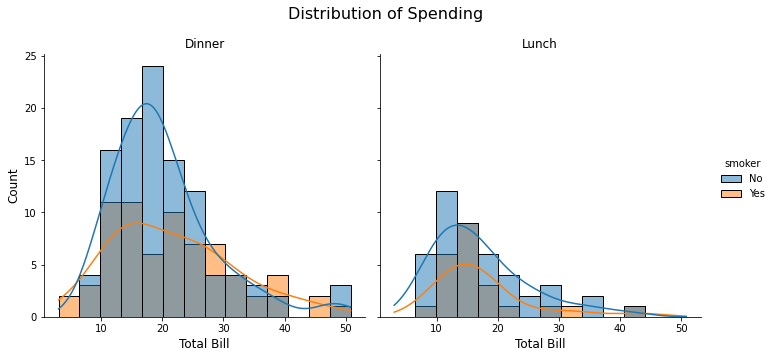

In [19]:
# A histogram with a kernel density estimator, with smoker as a color aesthetic, and facet by time
g = sns.displot(data = df, x='total_bill', kde = True, hue = 'smoker', col = 'time') # add a facet by time

# Separate the axes
axes = g.axes.flatten()

# Add x labels
axes[0].set_xlabel("Total Bill", size = 12)
axes[1].set_xlabel("Total Bill", size = 12)

# Add y labels
g.set_ylabels("Count", size = 12)

# Add titles 
axes[0].set_title("Dinner", size = 12)
axes[1].set_title("Lunch", size = 12)

# Add overall title
g.figure.suptitle('Distribution of Spending', fontsize = 16) #Use plt.suptitle rather than plt.title to change the overall title
g.figure.subplots_adjust(top=0.85); # Adjust the position of the suptitle




### Adjusting the size of the plot and saving

We use sns.set to adjust the size of the plot. We use the option "style = 'white' " to display a plain theme (the default for sns.set is a dark theme).

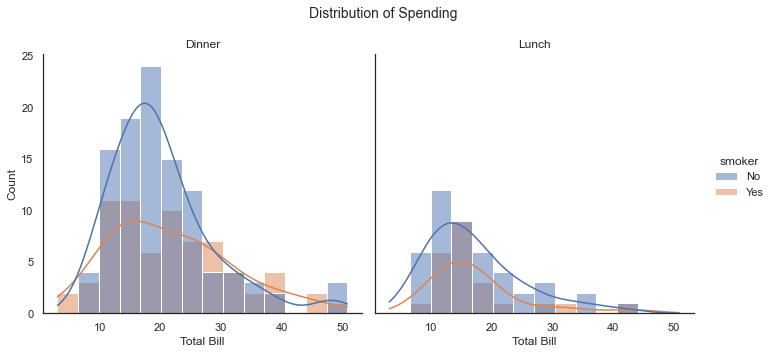

In [20]:
# Adjust the plot size
sns.set(rc= {"figure.figsize": (12, 8)}, style='white') 

# A histogram with a kernel density estimator, with smoker as a color aesthetic, and facet by time
g = sns.displot(data = df, x='total_bill', kde = True, hue = 'smoker', col = 'time') # add a facet by time

# Separate the axes
axes = g.axes.flatten()

# Add x labels
axes[0].set_xlabel("Total Bill", size = 12)
axes[1].set_xlabel("Total Bill", size = 12)

# Add y labels
g.set_ylabels("Count", size = 12)

# Add titles 
axes[0].set_title("Dinner", size = 12)
axes[1].set_title("Lunch", size = 12)

# Add overall title
g.figure.suptitle('Distribution of Spending', size = 14) #Use plt.suptitle rather than plt.title to change the overall title
g.figure.subplots_adjust(top=0.85); # Adjust the position of the suptitle

# Save the plot
g.figure.savefig("seaborn.png")


## Categorical Plots

The function `catplot` is a convenient seaborn function for plotting numerical values that correspond to different categories in a categorical variable. Different types of plots can be produced by using the "kind" option. These include 


Categorical scatterplots:

* stripplot() (with kind="strip"; the default)

* swarmplot() (with kind="swarm")

Categorical distribution plots:

* boxplot() (with kind="box")

* violinplot() (with kind="violin")

* boxenplot() (with kind="boxen")

Categorical estimate plots:

* pointplot() (with kind="point")

* barplot() (with kind="bar")

* countplot() (with kind="count")



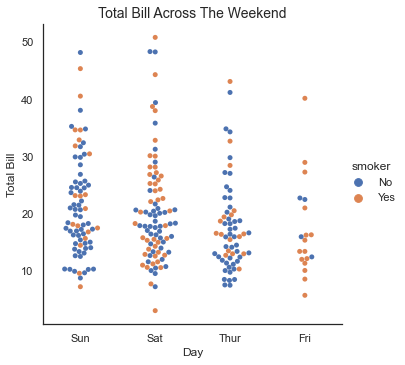

In [21]:
# jittered dotplot
sns.catplot(data=df, kind="swarm", x="day", y="total_bill", hue="smoker")

plt.ylabel("Total Bill")
plt.xlabel("Day")
plt.title("Total Bill Across The Weekend", size = 14);

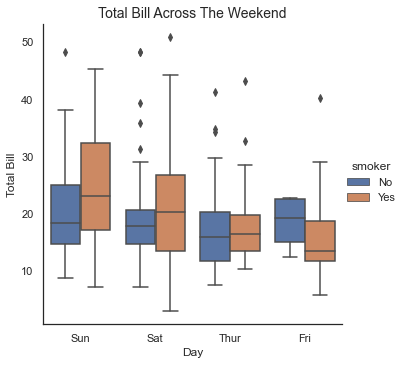

In [22]:
# boxplot
sns.catplot(data=df, kind="box", x="day", y="total_bill", hue="smoker")

plt.ylabel("Total Bill")
plt.xlabel("Day")
plt.title("Total Bill Across The Weekend", size = 14);

### Exercise (Read on your own)

Suppose we have records on the English, Math, Science test scores, the names of the students who sat for these tests, as well as whether they received private tuition. Each of these variables are stored separately as a Python list named names, english, math, science, and tuition, respectively, where tuition is a Boolean indicating if the student received private tuition. 

How would you plot the (kde) distribution of scores for math and science in the same plot, while they are faceted by whether the students received tuition? 

In [23]:
# Import random name generator
# pip install faker

from faker import Faker
faker = Faker() # instantiate the generator


In [24]:
# Generate the test scores

n = 50 # number of observations

# Generate correlated random data
mean = [62, 72, 65]  # Mean for english, math and science
cov_matrix = [[10, 5, 5],
              [5, 10, 5],
              [5, 5, 10]]  # Covariance matrix

scores = np.random.multivariate_normal(mean, cov_matrix, n)

# Round the scores
scores_round = pd.DataFrame(np.round(scores).astype(int))

In [25]:
# Generate the names

names = [faker.name() for _ in range(50)]
names = pd.Series(names)

In [26]:
# Generate the boolean vector, tuition.

tuition = pd.Series(np.random.choice([True, False], size=50)
)

In [27]:
# Construct the data frame

df_scores = pd.concat([names, scores_round, tuition], axis = 1)
df_scores.columns =['names','english', 'math','science', 'tuition' ]

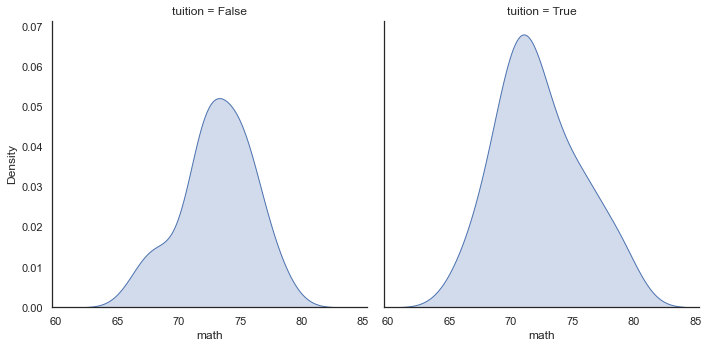

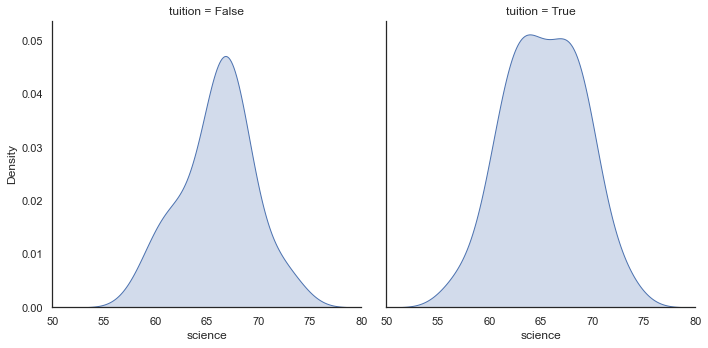

In [28]:
# Plot the distribution of math and science
sns.displot(data = df_scores, x = 'math', kind = 'kde', fill = True, col =  'tuition') 
sns.displot(data = df_scores, x = 'science', kind = 'kde', fill = True, col =  'tuition') 
plt.show()

How would you combine the distribution for math and science under each column and show them in the same plot? 

--------